# [George McNinch](http://gmcninch.math.tufts.edu) Math 87 - Spring 2025

# Week 13

# Curve-fitting

# Linear Regression


Consider a set of data $y_1,\dots,y_m$ measured at points $x_1,\dots,x_m$.

We'd like to find the *best fit* of a straight line through the points $(x_i,y_i)$ in the plane $\mathbb{R}^2$.

Thus, we'd like to find coefficients $\alpha,\beta$ such that

$$\alpha x_i + \beta \approx y_i \quad (1 \le i \le m).$$

We have two unknowns $a,b$ and $m$ data points, so if $m >2$ this should correspond to an *overdetermined system*.

Application of the method of *Least Squares* discussed above to this problem is known as *linear regression*.

Let's write our system in matrix form, first in the case where $m=3$:

$$\begin{matrix}
\alpha x_1 + \beta = y_1  \\
\alpha x_2 + \beta = y_2  \\
\alpha x_3 + \beta = y_3  
\end{matrix}
\implies
\begin{pmatrix}
x_1 & 1 \\
x_2 & 1 \\
x_3 & 1
\end{pmatrix}
\begin{pmatrix}
\alpha \\ \beta
\end{pmatrix} 
= \begin{pmatrix}
y_1 \\ y_2 \\ y_3
\end{pmatrix}$$



Our goal is to find $a,b$. Using the method of Least Squares, we consider the normal equations:

Write $A = \begin{pmatrix}
x_1 & 1 \\
x_2 & 1 \\
x_3 & 1
\end{pmatrix}$
and $\mathbf{b} = \begin{pmatrix}
y_1 \\ y_2 \\ y_3
\end{pmatrix}$

So we must solve the matrix equation
$$ A^T A \begin{pmatrix} \alpha \\ \beta
\end{pmatrix} =
A^T \mathbf{b}$$
for $\begin{pmatrix} \alpha \\ \beta
\end{pmatrix}$

Note that $A$ has rank 2 provided that $x_i\ne x_j$ for at least one pair $i \ne j$. Thus
the matrix $A^T A$ is invertible, and so there is a unique least-squares solution $\begin{pmatrix} \alpha \\ \beta
\end{pmatrix}$. 

The line $y = \alpha x + \beta$ is then the *best fit* to the data.

Example:
--------

Let's look at some data of the indicated form.

We first load the arrays ``x`` and ``y``.

In [1]:
import numpy as np
import numpy.linalg as la

x1=np.array( [0.2423001476908293, 0.5131246259108058,
            0.6461774297521172, 1.081718126671276, 1.1066957883683026,
            1.2111192770825507, 1.4107663065070208, 1.4131975649194517,
            1.5419085811341127, 1.54252479268561, 1.6770300002589544,
            1.7551956169308414, 1.7813053516565924, 1.8589163396218567,
            2.1309095689276414, 2.1754282799657187, 2.2037015837896003,
            2.3236943766271545, 2.3350556607482655, 2.4539996228127823,
            2.4576156244809266, 2.923756826621138, 2.9603842447427997,
            2.983549618501935, 3.1807751973214238, 3.2264704664586996,
            3.239574306883238, 3.366259631740789, 3.44332570682743,
            3.499492991470027, 3.5778026905209304, 3.7263844780555875,
            3.748176465962385, 3.7630392531018444, 3.82500728312557,
            3.840703575817898, 3.883434170161646, 3.9204994185997712,
            4.003630198700515, 4.048716471000086, 4.093275391602323,
            4.150511176497722, 4.446436799181704, 4.744462663968328,
            5.006360736646923, 5.061552738339686, 5.186531543235159,
            5.325087321284984, 5.378902191627528, 5.4322553049414335,
            5.579442903857698, 5.657430048039373, 5.676263610166316,
            5.798336865104675, 5.959056467826783, 6.061318417229272,
            6.06964642969886, 6.093223956306707, 6.478158146789935,
            6.536602960843557, 6.659316687948101, 6.687753518577183,
            6.863196862656075, 6.917623848496665, 7.158841237060627,
            7.194629418183499, 7.203946765983015, 7.249367122549896,
            7.261069631339737, 7.287252744675527, 7.346305663767231,
            7.3737179854364925, 7.466367724878489, 7.58659610075152,
            7.715645267370789, 7.782203173483429, 7.785342382089407,
            7.802602022584114, 8.101338980359483, 8.135285482190037,
            8.28839037936026, 8.431493684999166, 8.485586033957622,
            8.85209382371834, 9.047878431454915, 9.05343001103644,
            9.069972112952057, 9.182155314706655, 9.192372350356536,
            9.279577753181126, 9.374682847739509, 9.377466789602028,
            9.399110982574728, 9.480394501454253, 9.566216117340616,
            9.575498300284826, 9.586752014027084, 9.672607630688484,
            9.682121771410525, 9.966366902650725])

y1=np.array([10.678513316453799, 9.584529759457341, 8.933389099016741,
            8.87862266736914, 9.423027222054186, 7.438013534115137,
            6.9311080574968695, 8.290588998022537, 6.9339274272120255,
            6.477263126125214, 7.18255726109394, 7.34354559925455,
            5.848164724350601, 5.934986418528014, 5.739587800186909,
            6.3551105645234145, 4.93116293208016, 5.565267306640516,
            6.068819391147042, 4.2422617728095755, 4.339549441040255,
            3.936934088821659, 3.036014810980061, 2.899422680159072,
            3.288016727330138, 2.483313867446464, 3.620815631303368,
            1.7897486715633344, 2.84696838151993, 1.4267338461837338,
            2.7080781273543795, 1.1292831820994036, 1.067244502477275,
            2.7683112572214843, 2.6058180193619425, 2.648908190074,
            1.3990042102813791, 1.1164319243991843, 1.523589585780395,
            1.882457911030059, 0.7994184343137196, 0.5503403019975655,
            -0.7990859019486943, 0.5249368321797867, -1.1109219031528375,
            -2.0949474411711146, -2.638219680107408, -2.5738678800868238,
            -2.543579233502919, -2.2101226175665847, -3.586059377975382,
            -2.053027871767274, -3.3504551324932588, -3.021599640415171,
            -3.3122306023678876, -4.008657108762145, -4.980069709911616,
            -3.2827675476924436, -3.895938416357931, -4.874969268341777,
            -4.639501130091787, -4.899920594943358, -6.477979961761816,
            -7.0497428499160195, -5.571513677706172, -6.787215252732467,
            -6.2737864213441, -7.758876101699673, -8.114146089194973,
            -6.671329893713388, -6.385436025526582, -6.365364764823218,
            -6.303746443776603, -8.130546525025999, -7.723115107002123,
            -9.361367822284743, -7.946739978331863, -7.220171496026538,
            -9.345989645774747, -8.798860958460038, -9.5706899496564,
            -10.362339180159731, -10.595006740315613, -11.585157343328293,
            -11.855959857781063, -11.232459127265221, -11.106702212311582,
            -11.121677153583464, -11.629010242933319, -12.987414691633676,
            -12.918674413364048, -11.073001314425724, -11.797296747359566,
            -12.257399767617951, -13.879317776583441, -11.758373608587776,
            -13.04069656926525, -13.632789248750406, -12.446490726259036,
            -14.854056289273501])


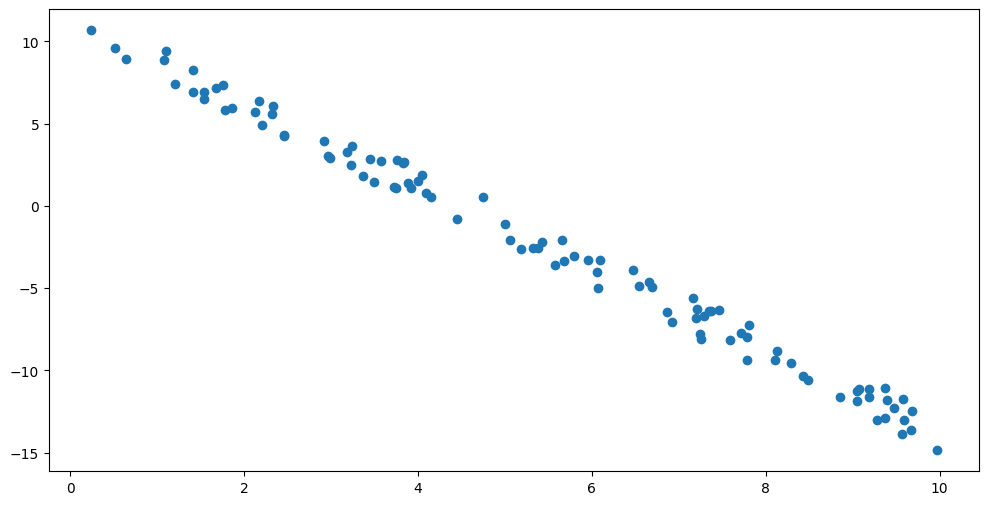

In [2]:
import matplotlib.pyplot as plt

## lists x,y have been populated; lets plot the points
def plot_data(x,y):
    fig, ax = plt.subplots(figsize=(12,6))
    return ax.plot(x,y,"o")

plot_data(x1,y1)

Now let's perform "linear regression" by solving the corresponding least squares problem. The main
thing to be done is creation of the matrix ``A``.

In [3]:
def lin_fit(x,y):
    # solve the least squares problem
    A = np.array([[xx,1] for xx in x])
    ls=la.lstsq(A,y,rcond=None)

    # get the coefficients and report them
    alpha,beta = ls[0]
    print(f"L(x) = {alpha:.03}*x + {beta:.03}")
    
    # return the linear function determined by these coefficients
    return lambda x:alpha*x + beta
    
L = lin_fit(x1,y1)

L(x) = -2.48*x + 11.0


(<Figure size 1200x600 with 1 Axes>, <Axes: >)

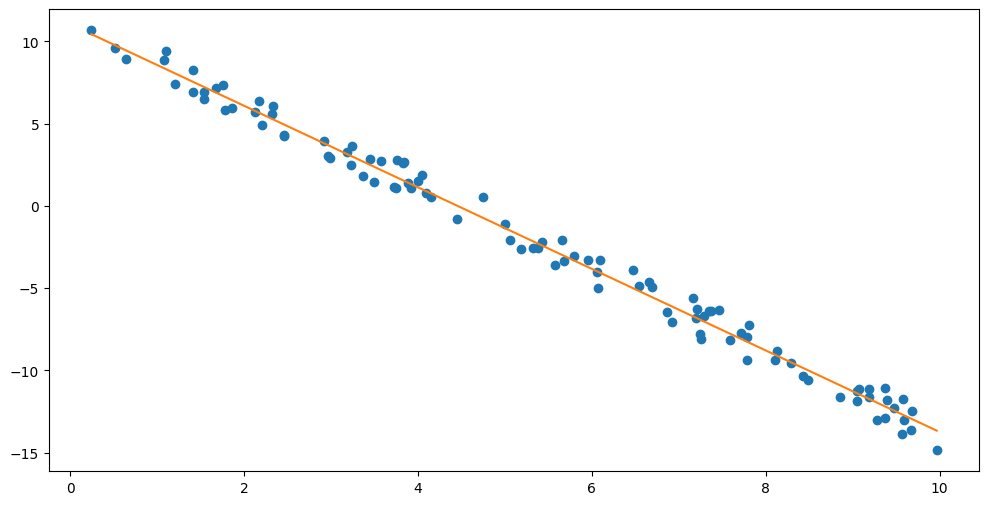

In [4]:
def plot_curve_fit(x0,f,x,y):
    # graph the line with slope alpha and y-intercept beta, and plot the data points
    #
    fig,ax = plt.subplots(figsize=(12,6))
    #ax.plot(x,alpha1*x + beta1)
    ax.plot(x,y,'o')

    ax.plot(x0,f(x0))

    return fig,ax
    
plot_curve_fit(x1,L,x1,y1)

# Fitting for higher degree polynomials



The preceding example determines a linear function which gives the best fit to the data. But
we can also attempt to match other curves.

Let's try the case of a quadratic polynomial.
Thus, we are given data $x_1,x_2,\dots, x_m$ and $y_1,y_2,\dots,y_m$, and we wish to find coefficients
$\alpha,\beta,\gamma$ such that

$$\alpha {x_i}^2 + \beta x_i + \gamma \approx y_i \quad (1 \le i \le m)$$

Note that the LHS is the $i$-th coefficient in the vector

$$A \cdot \begin{pmatrix}
\alpha \\ \beta \\ \gamma
\end{pmatrix}\qquad
\text{where}
\qquad
A = \begin{pmatrix}
{x_1}^2 & x_1 & 1 \\
{x_2}^2 & x_2 & 1 \\
\vdots & \vdots & \vdots \\
{x_m}^2 & x_m & 1 \\
\end{pmatrix}.$$




So the coefficients $\alpha,\beta,\gamma$ of the best-fitting curve 
$$Q(x) = \alpha x^2 + \beta x + \gamma$$
are obtained by finding the *least squares* solution for the equation

$$A \cdot \begin{pmatrix}
\alpha \\ \beta \\ \gamma
\end{pmatrix}
=
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_m \\
\end{pmatrix}$$


Let's first find the best-fit quadratic polynomial with our previous data set:

In [21]:
#
def quad_fit(x,y):
    # solve the least squares problem
    A = [[xx**2,xx,1] for xx in x]
    res=la.lstsq(A,y,rcond=None)

    # extract & report the coefficients
    alpha,beta,gamma=res[0]
    print(f"Q(x) = {alpha:.03}*x^2 + {beta:.03}*x + {gamma:.03}")

    def Q(x):
        return alpha*x**2 + beta*x + gamma
    # return the quadratic function determined by these coefficients
    return Q

Q = quad_fit(x1,y1)

Q(x) = -0.0103*x^2 + -2.37*x + 10.8


(<Figure size 1200x600 with 1 Axes>, <Axes: >)

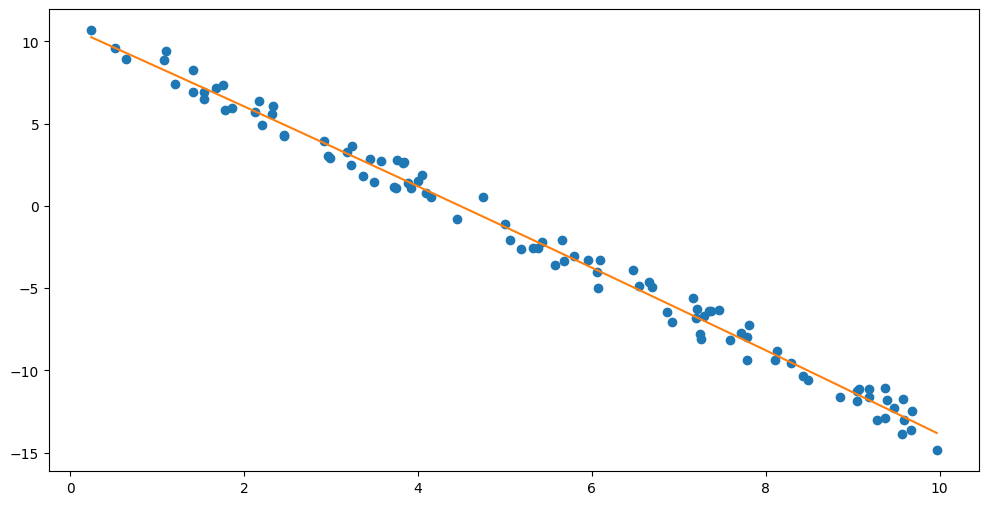

In [6]:
plot_curve_fit(x1,Q,x1,y1)

(<Figure size 1200x600 with 1 Axes>, <Axes: >)

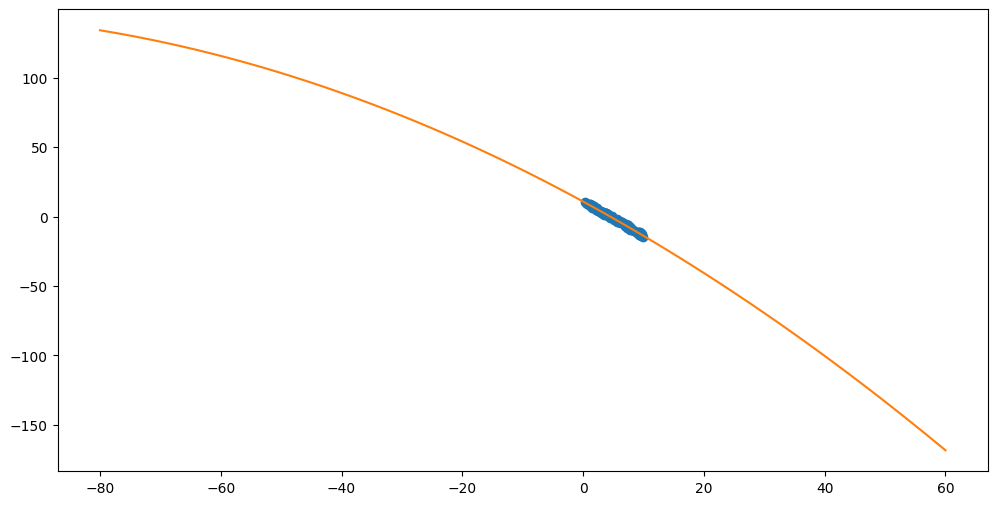

In [7]:
plot_curve_fit(np.linspace(-80,60,100),Q,x1,y1)


New data
---------

We load now some new data ``x2,y2``

In [22]:
x2=np.array([-9.500506098628847, -9.436078956402293,
             -9.164729339392766, -8.45233138486573, -8.307739104979152,
             -7.828001140674944, -7.705455728811295, -7.571960471086983,
             -6.987892876786192, -6.607031656307571, -6.564029048283118,
             -6.393814384261753, -5.998800384719204, -5.7183134001218345,
             -5.560757660996165, -5.313898241447623, -5.180315921867592,
             -4.703049758011512, -4.65291534750819, -4.636925028892335,
             -4.473995832831181, -4.349582934094259, -4.276820618215415,
             -3.9856919476729056, -3.3024763695520782, -2.930284450264594,
             -2.460449933651126, -2.388066289115109, -2.3869772995550846,
             -2.382172607813456, -2.282647403270765, -2.2514206929597433,
             -2.2151987854220563, -1.8688379031501547, -1.040037196669891,
             -0.592982419578636, -0.5285061183473907, -0.07469879485638131,
             -0.03672428155128671, 0.08965963140970601, 0.554605101162359,
             1.2625261558731822, 1.3951852942052394, 1.422010962689896,
             1.5779572321503075, 1.5791882604555276, 1.61640050593763,
             1.8955924638126866, 2.4120975394418576, 2.4275213285530626,
             2.640546120143096, 3.118535721592007, 3.7246612880274874,
             3.778405649802931, 3.818590524157603, 3.8965198726985513,
             3.9968635744727568, 4.05853387329822, 4.842259209080241,
             5.2644529452275215, 5.329049050145095, 5.412276483696772,
             5.820060572107913, 5.824669115601578, 6.398794721957497,
             6.4402471330505975, 6.778030229348008, 6.822865684632326,
             7.154884482248647, 7.433033388040794, 7.95313306257955,
             8.542338054047299, 8.67214809353717, 8.695899516122513,
             8.734604130466039, 8.853944058863625, 8.878828934856866,
             9.052318939780356, 9.05661642071038, 9.362282799156798,
             9.610149658359706, 10.214633633482066, 10.307112596020925,
             10.619306436246774, 10.621964709661611, 10.905709588359596,
             11.16622763212822, 11.50521260209901, 11.629057622884542,
             11.753805653041166, 11.807760553764172, 12.170454913700738,
             12.228946860809256, 12.238348904416945, 12.427719333651723,
             13.053306270918945, 14.03578560105586, 14.327026523434942,
             14.636621765165128, 14.744885176800103])


y2=np.array([242.5396610014489, 262.99748345006117,
             236.21962830726534, 203.36741916361822, 204.59490171086318,
             169.55460040120266, 157.45527545110704, 145.4060333613558,
             158.9329865744686, 145.1180030935003, 103.48587998057566,
             90.98530811955919, 115.82927769102031, 98.2457769772088,
             109.86609808439744, 61.132312437676916, 102.58437854309983,
             80.22317148499344, 60.88436606939928, 58.026728933635454,
             67.27333189547187, 83.32681082764311, 47.84696391123863,
             34.55757018595044, 18.228825041017465, -3.45933210037197,
             41.72125747872123, 20.797350275633658, 45.8894100648326,
             -1.5174797860946683, 0.636099698366511, 29.059890341434148,
             2.311482993391394, -3.4171765808344308, 15.63969965759749,
             -12.776680135544654, 23.635189348858646, -18.932585171656093,
             31.934447339913138, -7.254615510171753, -7.447589708144465,
             21.5170767071797, -10.605455001783469, 37.97690993632591,
             -16.28075900816511, 17.514929406199215, -15.41909805330178,
             -9.28169529245514, 1.6114757958711792, -2.772531397475941,
             31.36303821387554, 48.44461813262329, 21.133120624334147,
             55.09416933352425, 46.091773340771034, 32.460057766234485,
             51.29572119122864, 84.45347100398384, 100.91738746516664,
             118.76834790433631, 89.83233547020102, 103.01856200603174,
             127.02275401927923, 126.50985785898953, 106.89953936401625,
             138.03228724012408, 154.39572040750687, 167.11136504224805,
             166.55137233758427, 185.72301536715477, 184.77395051270676,
             252.36187934583052, 226.68621500173575, 207.63736161137572,
             251.34665622040202, 229.428513458754, 247.93401134715828,
             255.26504804394153, 248.81465414128846, 246.64287358721634,
             300.0379742831173, 324.57035644342176, 359.6415758204655,
             354.6547519583311, 343.8702990976892, 372.48584664055744,
             364.8394942502537, 430.1991994902185, 438.6303667250944,
             403.11528216459146, 412.71074061223993, 453.6054297235233,
             478.9207367814926, 481.9332925595611, 450.91801347136175,
             497.7328569627587, 614.3798601360598, 625.8601324671473,
             672.018324952574, 659.0107875019195])


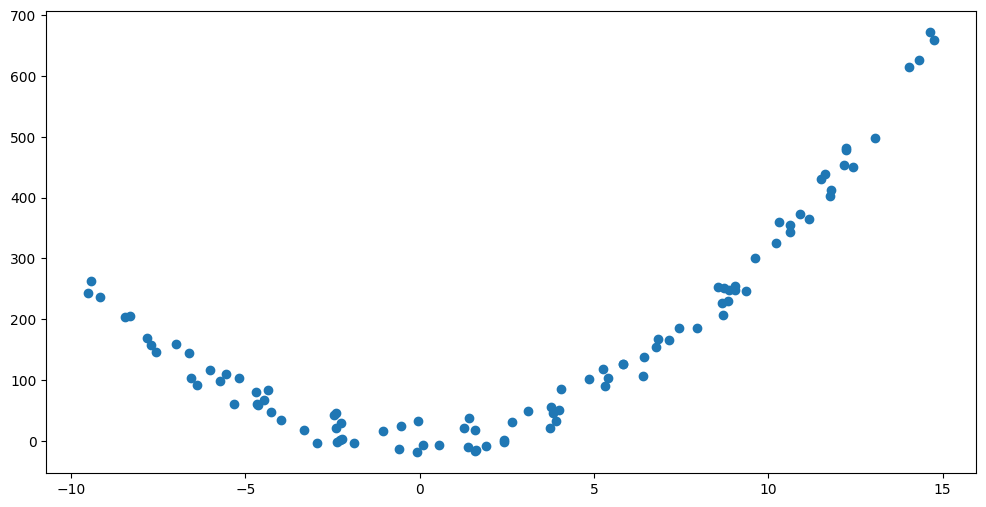

In [23]:
plot_data(x2,y2)

In [24]:
Q2=quad_fit(x2,y2)

Q(x) = 2.97*x^2 + 1.19*x + 2.21


(<Figure size 1200x600 with 1 Axes>, <Axes: >)

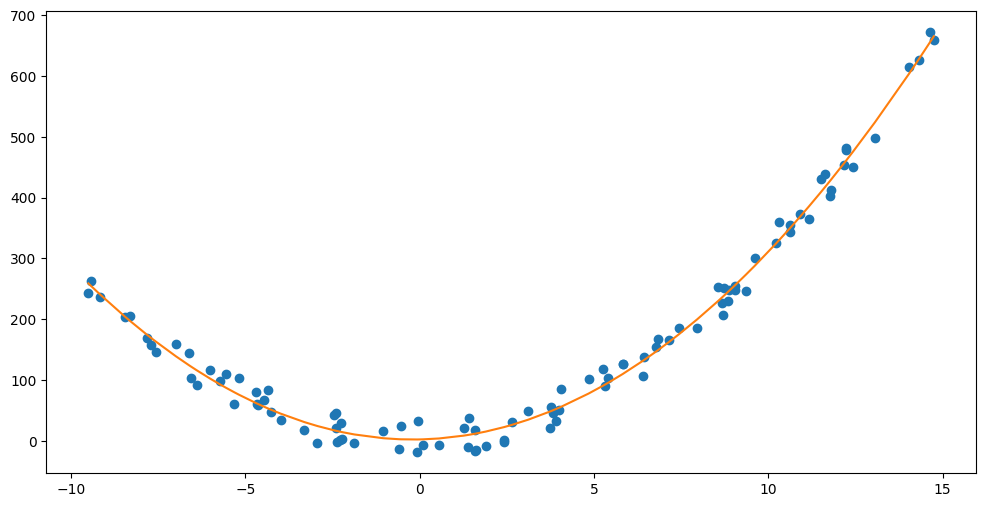

In [25]:
plot_curve_fit(x2,Q2,x2,y2)


L(x) = 16.4*x + 1.22e+02


(<Figure size 1200x600 with 1 Axes>, <Axes: >)

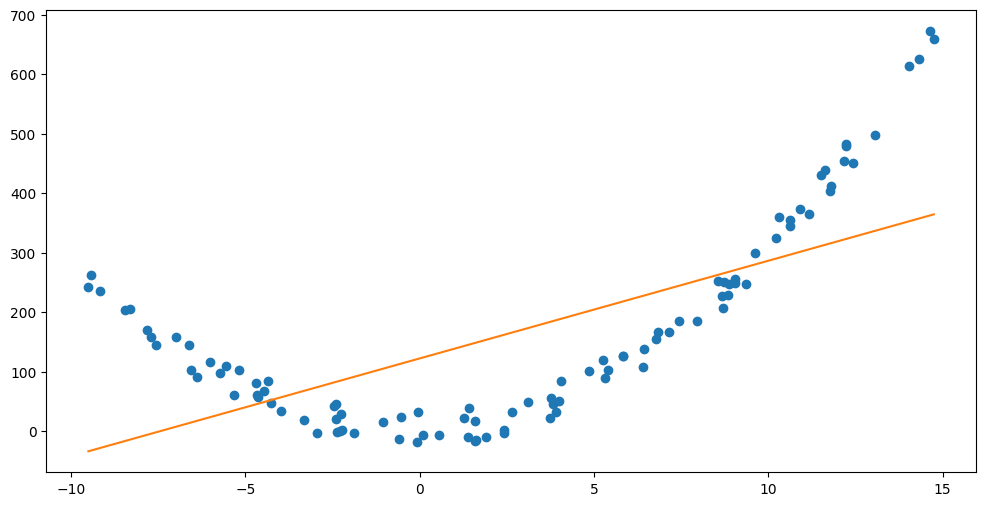

In [26]:
L2=lin_fit(x2,y2)
plot_curve_fit(x2,L2,x2,y2)

# Linear functions of several variables


Consider some data of the form $\{(x_i,y_i,z_i)\}$ where
$z_i$ is supposed to depend on the pair $(x_i,y_i)$.

We'd like to find the linear function $z = L(x,y)$ that best fits
the data.  Here, a linear function \(L\) has the form
\begin{equation*}
L = \alpha x + \beta y + \gamma
\end{equation*}
for real numbers $\alpha,\beta,\gamma$, so our task is to find these coefficients.

For each \(i\), we would like the estimate
\begin{equation*}
\alpha x_i + \beta y_i + \gamma \approx z_i
\end{equation*}
to be good. We note that
\begin{equation*}
\alpha x_i + \beta y_i + \gamma = \begin{pmatrix}
x_i & y_i & 1 \\
\end{pmatrix}\cdot
\begin{pmatrix}
\alpha \\ \beta \\ \gamma
\end{pmatrix}
\end{equation*}
Thus the data set leads to the (approximate) matrix equation

\begin{equation*}
(*) \quad \begin{pmatrix}
x_0 & y_0 & 1 \\
x_2 & y_2 & 1 \\
\vdots & \vdots &  \vdots \\
x_i & y_i & 1 \\
\vdots & \vdots &  \vdots \\
x_{N-1} & y_{N-1} & 1 \\
\end{pmatrix}
\begin{pmatrix}
\alpha \\ \beta \\ \gamma
\end{pmatrix}
=\begin{pmatrix}
z_0 \\ z_2 \\ \vdots \\ z_i \\ \vdots \\ z_{N-1}
\end{pmatrix}
\end{equation*}

Thus to find the best fit linear function $L(x,y) = \alpha x + \beta
y + \gamma$, we find the least-squares solution to $(*)$.

We are going to represent our data as 3 lists in python: `x,y,z`
where $(x_i,y_i,z_i)$ is represented by `(x[i],y[i],z[i])`.

In [13]:
import numpy as np
import numpy.linalg as la
  
def lin2var_solve(xs,ys,zs):
    # return the coefficients of the linear function z=L(x,y)
    # which best approximates the data xs,ys,zs
    
    A = np.array([[x,y,1]
                  for x in xs
                  for y in ys
                  ])
    return la.lstsq(A,zs)

On the other hand, let's make some code to *generate* some linear data

In [14]:
# create a random number generator
rng = np.random.default_rng()

def gen_approx_value(L,var):
    
    # for the function L of two variables
    # generate an approximate value 
    # in the interval (z-var,z+var)
    # where z = L(x,y) is the "actual" value

    def L_rand(x,y):
        return L(x,y) - var + 2*rng.random()*var
    
    return L_rand

def gen_approx_values_lin(alpha,beta,gamma,xs,ys,var):
    # alpha, beta, gamma are coeffs of the linear function
    # L(x,y) = alpha*x + beta*y + gamma

    # x,y are lists of x and y values of the same length N
    # 
    # the function returns a list of approximate values
    # where the value at (x,y) is in the interval (z-var,z+var)
    # where z=L(x,y)
    def L(x,y):
        return alpha*x + beta*y + gamma
    LRand = gen_approx_value(L,var)
    return np.array([LRand(x,y)
                     for x in xs
                     for y in ys ])


Now, `np.linspace(a,b,num=N)` creates a list of N evenly spaced
numbers between a and b. So let's create values for the function
\begin{equation*}
L(x,y) = 3 x - 2 y - 6
\end{equation*}


In [15]:
xs = np.linspace(0,10,num=50)
ys = np.linspace(0,10,num=50)

zs = gen_approx_values_lin(3,-2,-6,xs,ys,.5)
zs

array([-5.6940968 , -6.75110165, -6.97400299, ...,  5.04145693,
        4.35672727,  3.51173044], shape=(2500,))

Now let's see how good the function `lin2var_solve` is at finding the
coefficients $2,-2,-6$ of `L`.


In [27]:
result = lin2var_solve(xs,ys,zs)
result[0]

array([ 2.99880869, -1.99836658, -5.99121294])

# Quadratic functions of several variables

Again consider data $\{(x_i,y_i,z_i)\}$ where $z_i$ is supposed
to depend on the point $(x_i,y_i)$.

This time, though, we would like to fit the points to a quadratic
function $Q(x,y)$ of $x$ and $y$.

A quadratic function has the form
\begin{equation*}
Q(x,y) = \alpha_1 x^2 + \alpha_2 y^2 + \alpha_3 xy + \alpha_4 x + \alpha_5 y + \alpha_6
\end{equation*}

So in this setting, our task is to find $\alpha_1,\cdots,\alpha_6$
so that $Q(x_i,y_i)$ is a good approximation to $z_i$ for all
$i$.

Of course, the equation
$z_i = Q(x_i,y_i)$ may be written
\begin{equation*}
z_i = \alpha_1 x^2 + \alpha_2 y^2 + \alpha_3 xy + \alpha_4 x + \alpha_5 y + \alpha_6
= \begin{pmatrix}
x_i^2 & y_i^2 & x_iy_i & x_i & y_i & 1
\end{pmatrix}
\begin{pmatrix}
\alpha_1 \\ \alpha_2 \\ \alpha_3 \\ \alpha_4 \\ \alpha_5 \\ \alpha_6
\end{pmatrix}
\end{equation*}
Thus we can find the $\alpha_i$ by finding the least squares solution to the matrix equation

\begin{equation*}
\begin{pmatrix}
x_0^2 & y_0^2 & x_0y_0 & x_0 & y_0 & 1 \\
x_1^2 & y_1^2 & x_1y_1 & x_1 & y_1 & 1 \\ 
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
x_i^2 & y_i^2 & x_iy_i & x_i & y_i & 1 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
x_N^2 & y_N^2 & x_Ny_N & x_N & y_N & 1 \\
\end{pmatrix}
\begin{pmatrix}
\alpha_1 \\ \alpha_2 \\ \alpha_3 \\ \alpha_4 \\ \alpha_5 \\ \alpha_6
\end{pmatrix}
=
\begin{pmatrix}
z_0 \\ z_2 \\ \vdots \\ z_i \\ \vdots \\ z_{N-1}
\end{pmatrix}
\end{equation*}

We define a function to find the coefficients of the quadratic
function which best fits the data given by lists `xs`, `ys`, and `zs`.


In [17]:
import numpy as np
import numpy.linalg as la

def lin2quad_solve(xs,ys,zs):
    # return the coefficients of the linear function z=L(x,y)
    # which best approximates the data xs,ys,zs
      
    A = np.array([[x**2,y**2,x*y,x,y,1]
                  for x in xs
                  for y in ys
                  ])
    return la.lstsq(A,zs)

We define a function which will generate values which are close to the
values for a quadratic function


In [18]:
def gen_approx_values_quad(alpha,xs,ys,var):
  # alpha is the list of coeffs of the quadratic function
  # L(x,y) = alpha[0]*x**2 + alpha[1]*y**2 + alpha[2]*x*y
  #        + alpha[3]*x + alpha[4]*y + alpha[5]

  # x,y are lists of x and y values of the same length N
  # 
  # the function returns a list of approximate values
  # where the value at (x,y) is in the interval (z-var,z+var)
  # where z=L(x,y)
  def r(x,y):
      return np.array([ x**2, y**2, x*y, x, y, 1])
  def Q(x,y):
      return np.array(alpha) @ r(x,y)
  Qrand = gen_approx_value(Q,var)
  return np.array([Qrand(x,y)
                   for x in xs
                   for y in ys ])

Now we generate some values for a given quadratic function:

In [28]:
x1s = np.linspace(0,10,num=50)
y1s = np.linspace(0,10,num=50)

alpha = [ 1, 1, 2, -2, 3, 5]

z1s = gen_approx_values_quad(alpha,xs,ys,.5)
z1s

array([  4.6958478 ,   5.18053921,   6.30629403, ..., 397.69105613,
       406.14188429, 414.98199252], shape=(2500,))

And we check to compute the coefficients for the best quadratic fit
for the data we just generated

In [29]:
result1 = lin2quad_solve(x1s,y1s,z1s)
result1[0]

array([ 1.00031461,  0.99973339,  1.99979775, -2.00241972,  3.0068305 ,
        4.98346421])